#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 import하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림
- 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacted=True, alpha=0.8)(수평막대그래프)
- 히스토그램 : df.plot(kind='hist')
- 산점도 : df.plot(x='column_X',y='column_Y',kind='scatter') 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind='box), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### Matplotlib
- histogram : plt.hist(x,bins=)
- line plot : plt.plot(x,y)
- bar plot : plt.bar(x,y,color='')
- scatt plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data,bins=,color=,kde=)
- sns.histplot(data,color=,kde=)
- sns.boxplot(x,y,data,color)
- sns.violinplot(s,y,data,color)
- sns.barplot(x,y,data,color)
- sns.joinplot(x,y,data,color)
- sns.pairplot(data,hue) palette
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

http://seaborn.pydata.org/api.html 참고하려면 참고

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [16]:
li = ['Date','Close','Start','High','Low','Volume']
df.drop('전일종가',axis =1, inplace = True)
df.columns = li
df.head()

,Date,Close,Start,High,Low,Volumn
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volumn  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [17]:
# Q. Date를 datetime으로 변경한 후 인덱스로 
df.Date = pd.to_datetime(df.Date)
df1= df.set_index('Date')
df1.drop('Volumn',axis = 1, inplace = True)
df1.head()

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='Date'>

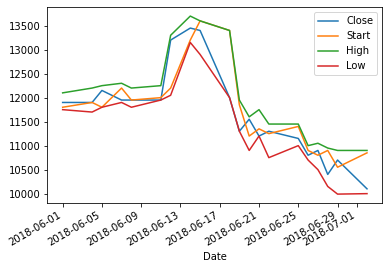

In [18]:
# 선그래프
df1.plot()

<AxesSubplot:xlabel='Date'>

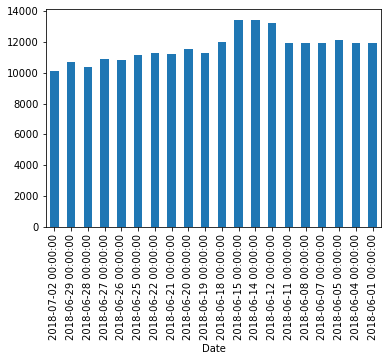

In [31]:
df1.Close.plot(kind='bar')

In [41]:
df2 = df1.sort_index(ascending=True)

<AxesSubplot:xlabel='Date'>

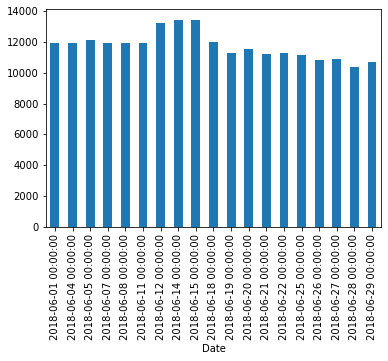

In [42]:
# Q. 6월 데이터만을 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.
df2.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

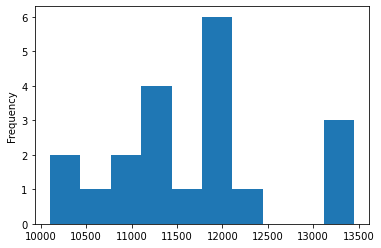

In [43]:
df2.Close.plot(kind='hist')

In [47]:
df.rename(columns = {'Volumn':'Volume'},inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<AxesSubplot:ylabel='Frequency'>

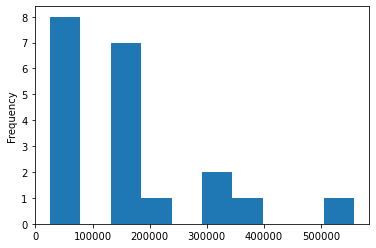

In [48]:
df.Volume.plot(kind='hist')

In [49]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

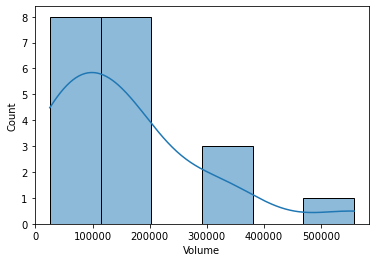

In [50]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

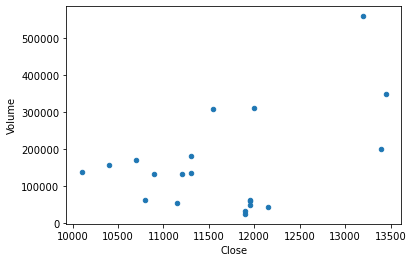

In [53]:
df.plot(x='Close',y='Volume',kind='scatter')

<AxesSubplot:>

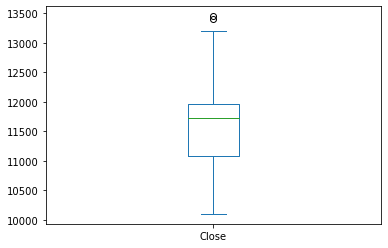

In [54]:
# Box Plot
df.Close.plot(kind='box')

In [62]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

#### Box plot 의미 해석
- IQR(Inter Quartile Range) : 제 3사분위수(Q3) - 제 1사분위수(Q1)
- lower whisker : Q1 - 1.5 * IQR 이내인 값 중에서 최솟값 (통계적으로 이상치를 제외)
- upper whisker : Q3 + 1.5 * IQR 이내인 값 중에서 최댓값 (통계적으로 이상치를 제외)
- 이상치 : lower whisker, upper whisker 를 벗어나는 값

In [70]:
# Close 컬럼의 이상치
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
up_check = Q3 + 1.5*IQR
print(up_wh)
print()
print(df.Close.sort_values(ascending=False)[:5]) # upper whisker 값은 13200 임
df.Close.loc[df.Close>up_wh]


13275.0

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64


11    13400
12    13450
Name: Close, dtype: int64

<AxesSubplot:>

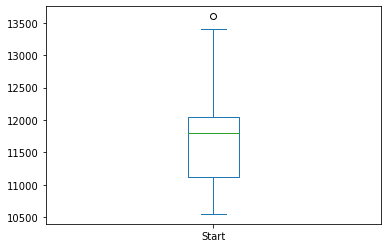

In [71]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box plot 및 이상치를 구하세요.
df.Start.plot(kind='box')

In [73]:
df.Start.describe()

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

In [18]:
Q3 = df.Start.describe()['75%']
Q1 = df.Start.describe()['25%']
IQR = Q3 - Q1
up_check = Q3 + 1.5*IQR
print(up_check)
df.Start.loc[df.Start>up_check]

13437.5


11    13600
Name: Start, dtype: int64

[과제] df_ep 데이터프레임으로 다음을 수행하세요

- 선그래프
- 'south'칼럼의 막대그래프
- 'south'칼럼의 히스토그램
- box plot

In [6]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [9]:
df_ep.set_index('year',inplace = True)

<AxesSubplot:xlabel='year'>

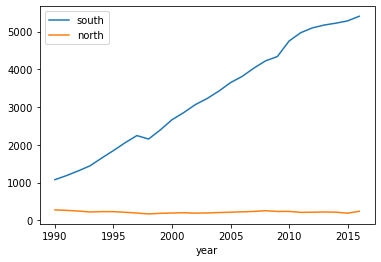

In [10]:
import warnings
warnings.filterwarnings('ignore')
df_ep.plot()

<AxesSubplot:xlabel='year'>

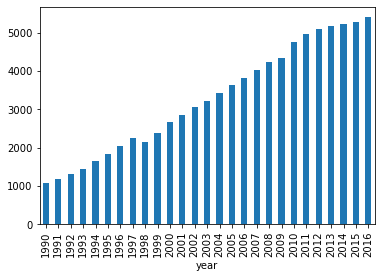

In [11]:
df_ep.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

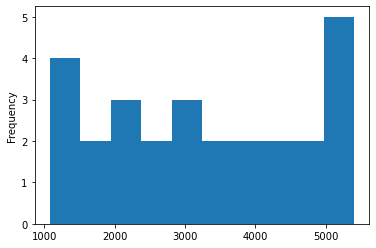

In [12]:
df_ep.south.plot(kind='hist')

<AxesSubplot:>

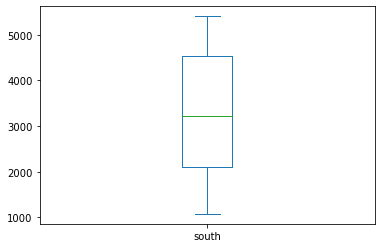

In [13]:
df_ep.south.plot(kind='box')

In [15]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [70]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [71]:
df_auto.replace('?',np.nan,inplace = True)
df_auto.dropna(subset = ['horsepower'], inplace = True)

In [72]:
df_auto.horsepower.astype(int)
df_auto.info()
# mpg 연비
# cylinders 자동차 엔진 실린더 수
# displacement 배기량
# horsepower 마력
# weight 차 무게
# acceleration 제로백
# model year 자동차 생산년도
# origin 자동차 만든 국가로 추정
# car name 자동차 이름

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [75]:
df_auto['car name'].value_counts()
#겹치는것이 적으므로 삭제

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [50]:
df_auto.drop('car name',axis = 1 ,inplace = True)

In [51]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

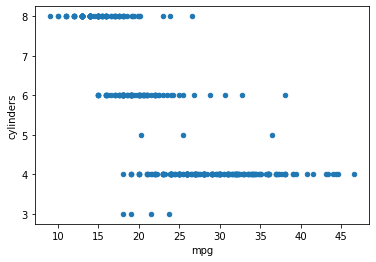

In [54]:
df_auto.plot(x='mpg',y='cylinders',kind='scatter')
# 실린더 수가 많을수록 연비가 적다

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

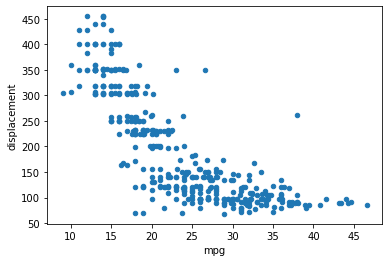

In [55]:
df_auto.plot(x='mpg',y='displacement',kind='scatter')
# 배기량이 높을수록 연비는 낮아진다.

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

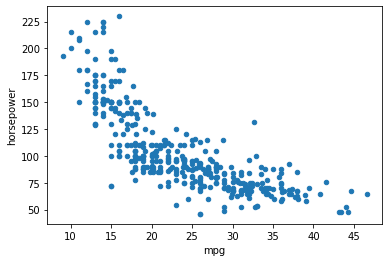

In [56]:
df_auto.plot(x='mpg',y='horsepower',kind='scatter')
# 마력 높을수록 연비는 낮아진다.

<AxesSubplot:xlabel='mpg', ylabel='weight'>

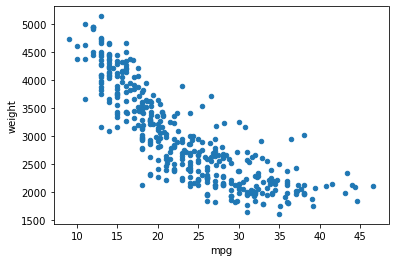

In [57]:
df_auto.plot(x='mpg',y='weight',kind='scatter')
# 무게가 높을수록 연비는 낮아진다.

<AxesSubplot:xlabel='mpg', ylabel='acceleration'>

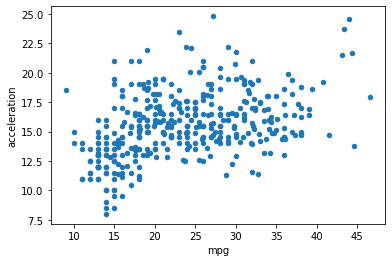

In [58]:
df_auto.plot(x='mpg',y='acceleration',kind='scatter')
# 제로백과 연비는 상관관계가 적지만 제로백이 높을수록 연비도 높아지는 경향은 있음

<AxesSubplot:xlabel='mpg', ylabel='model year'>

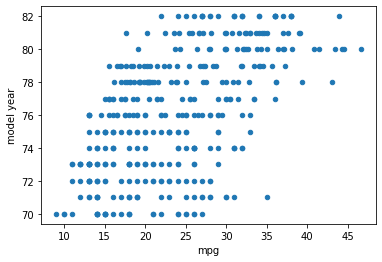

In [59]:
df_auto.plot(x='mpg',y='model year',kind='scatter')
# 크게 영향은 없지만 연도가 높을수록 연비도 높은 경향이 있음

<AxesSubplot:xlabel='mpg', ylabel='origin'>

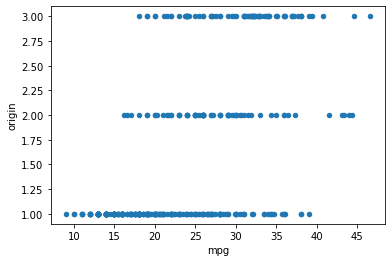

In [60]:
df_auto.plot(x='mpg',y='origin',kind='scatter')
# 상관관계는 적으나 origin 1 2 3 순으로 연비가 높은경향이 있음

<AxesSubplot:xlabel='horsepower', ylabel='displacement'>

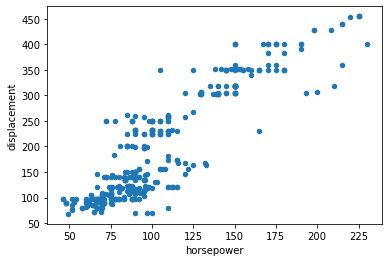

In [67]:
df_auto.plot(x='horsepower',y='displacement',kind='scatter')
# 배기량이 높을수록 마력이 높다

<AxesSubplot:xlabel='weight', ylabel='acceleration'>

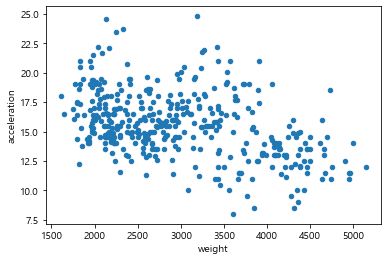

In [146]:
df_auto.plot(x='weight',y='acceleration',kind='scatter')
# 무게가 낮을수록 제로백이 높은 경향은 있으나 예상외로 큰 상관관계는 없음

(array([1., 3., 2., 2., 2., 2., 2., 3., 6., 2., 3., 2., 4., 3., 1., 4., 3.,
        1., 2., 2.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ,
        31.7, 34.4, 37.1, 39.8, 42.5, 45.2, 47.9, 50.6, 53.3, 56. ]),
 <BarContainer object of 20 artists>)

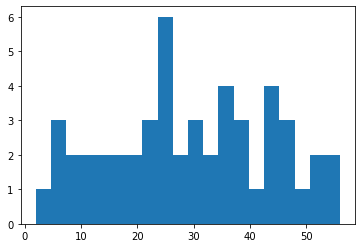

In [79]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
import matplotlib.pyplot as plt
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,size = 50)
plt.hist(data,bins=20) # bin이 높을수록 세분화됨

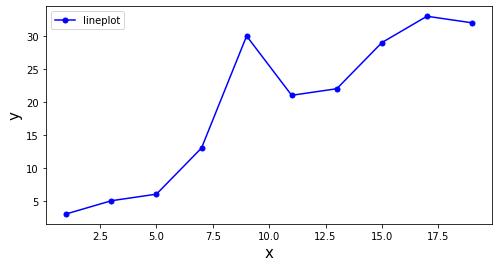

In [102]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

plt.figure(figsize = (8,4)) # 가로 세로
plt.plot(x,y,color='blue',marker='o',markersize=5)  # 색과 마커 설정
plt.xlabel('x',size=15)   #  x축 라벨 붙이기
plt.ylabel('y',size=15)   #  y축 라벨 붙이기
plt.legend(labels=['lineplot'])  # 범례 만들기

Text(0.5, 1.0, 'Line Graph')

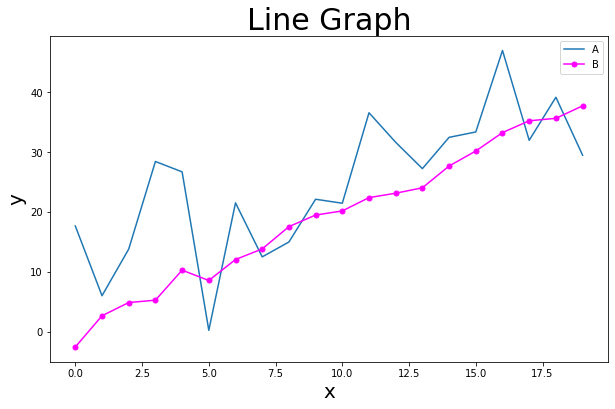

In [112]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize = (10,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o',markersize=5)  
plt.xlabel('x',size=20)   
plt.ylabel('y',size=20)  
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

Text(0.5, 0, 'X')

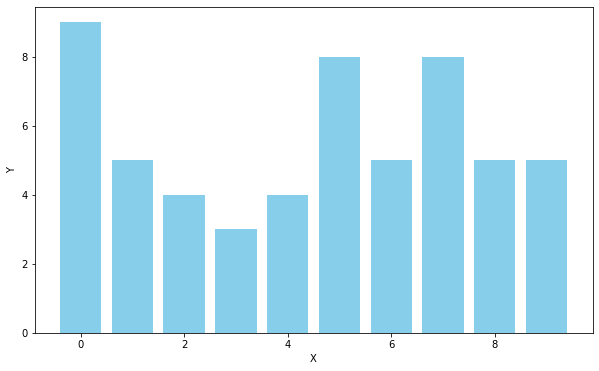

In [119]:
# 막대그래프
y = np.random.randint(2,10,size=10)
x = range(len(y))
plt.figure(figsize = (10,6))
plt.bar(x,y,width=0.8,color = 'skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [122]:
df = pd.read_csv('./dataset/movie.csv')
df

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466
5,20180220,6,NEW,20179985,코코,56664400,7967


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

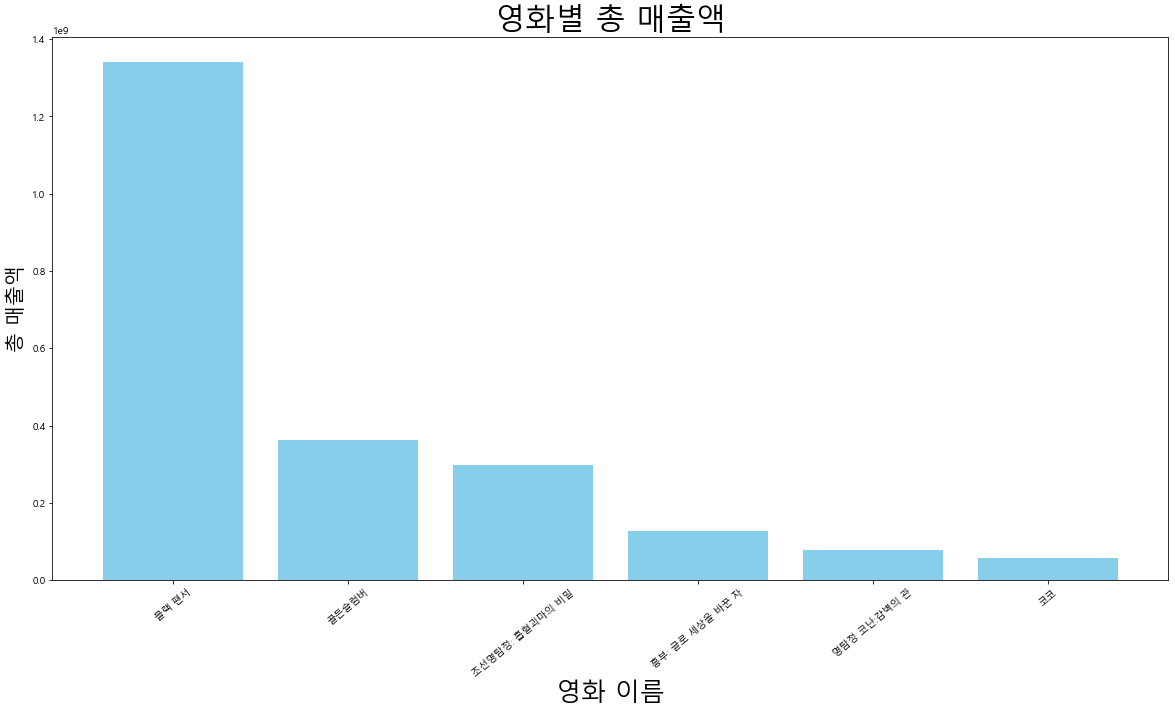

In [140]:
# Q. movie.csv에서 x축을 movieNm y축을 salesAmt로 하여 막대그래프 작성
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리

plt.figure(figsize = (20,10))
plt.bar(df.movieNm,df.salesAmt,color='skyblue')
plt.xlabel('영화 이름',size = 25)
plt.ylabel('총 매출액',size = 20)
plt.title('영화별 총 매출액',size = 30)
plt.xticks(rotation=40) # x축 밸류값 회전

In [142]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine='openpyxl')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0, 0.5, 'weight')

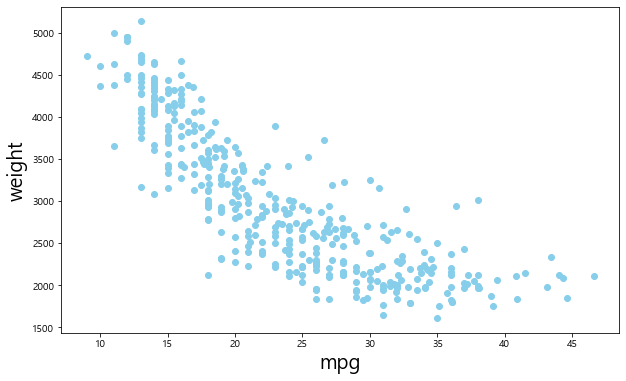

In [148]:
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size = 20)
plt.ylabel('weight',size = 20)

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

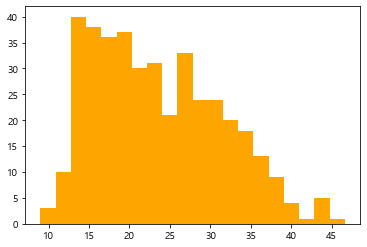

In [153]:
# histogram
plt.hist(x,bins = 20 , color = 'orange')

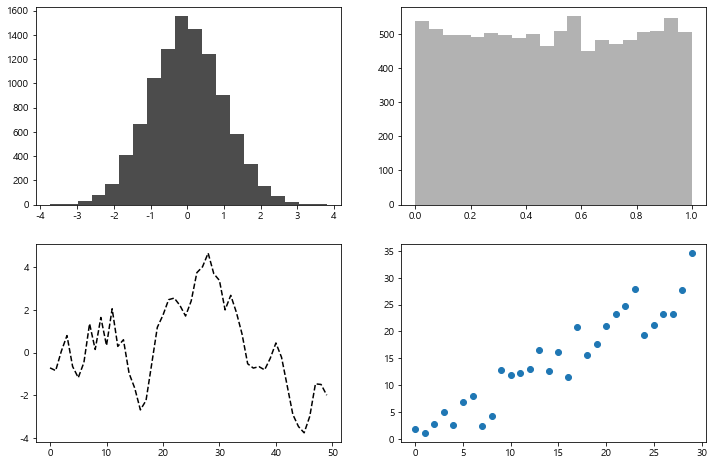

In [170]:
fig = plt.figure(figsize = (12,8))
# figure가 2 x 2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

np.random.seed(0)

ax1.hist(np.random.randn(10000),bins=20, color='k',alpha=0.7) # alpha 는 흐리게
ax2.hist(np.random.rand(10000),bins=20, color='k',alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

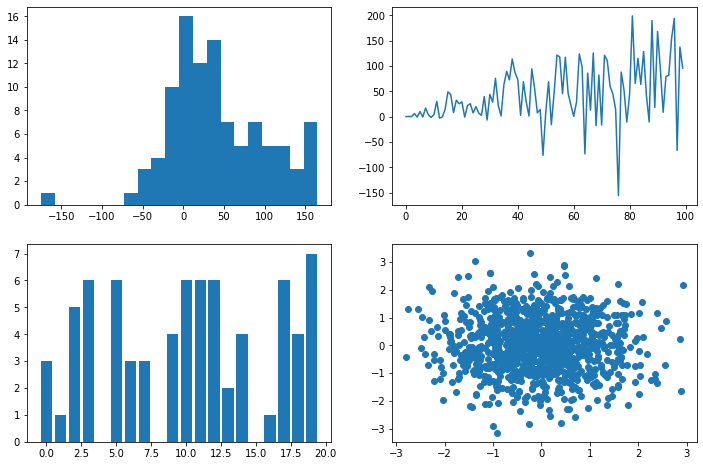

In [5]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.arange(100)+np.arange(100)*np.random.randn(100),bins=20)
ax2.plot(np.arange(100),np.arange(100)+np.arange(100)*np.random.randn(100))
ax3.bar(np.arange(20),np.random.choice(range(10),20))
ax4.scatter(np.random.randn(1000),np.random.randn(1000))

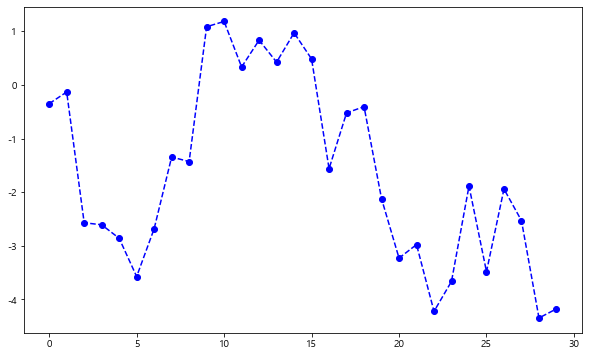

In [172]:
from numpy.random import randn
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle='dashed',color='b',marker='o')

In [175]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [183]:
# Q. t3에서 age열을 범주화한 후 age_cat 열을 추가하세요.
def age_cat(age):
    cat = ''
    if age <10 : cat = 'child'
    elif age < 20 : cat = '10'
    elif age < 30 : cat = '20'
    elif age < 40 : cat = '30'
    elif age < 50 : cat = '40'
    elif age < 60 : cat = '50'
    else: cat = 'Elder'
    return cat
t3['age_cat']=t3.age.apply(lambda x : age_cat(x))
t3[['age','age_cat']].head()

,age,age_cat
0,29.00,20
1,0.92,child
2,2.00,child
3,30.00,30
4,25.00,20


         pclass  survived      age  sibsp  parch       fare    body  Ritio  \
age_cat                                                                      
10          356        56  2380.00    105     69  4534.9836  1982.0    143   
20          838       127  8402.00    112     77  9198.3038  5125.0    344   
30          488        98  7855.50     80     73  9578.5332  5020.0    232   
40          250        52  5958.50     50     68  5723.5168  3429.0    135   
50          101        32  3751.50     29     21  4384.9541  1889.0     70   
Elder       755        85  2578.00    142     82  7726.7706  2009.0    303   
child       216        50   330.17    135    114  2403.4248     4.0     82   

         Ratio  
age_cat         
10         143  
20         344  
30         232  
40         135  
50          70  
Elder      303  
child       82  


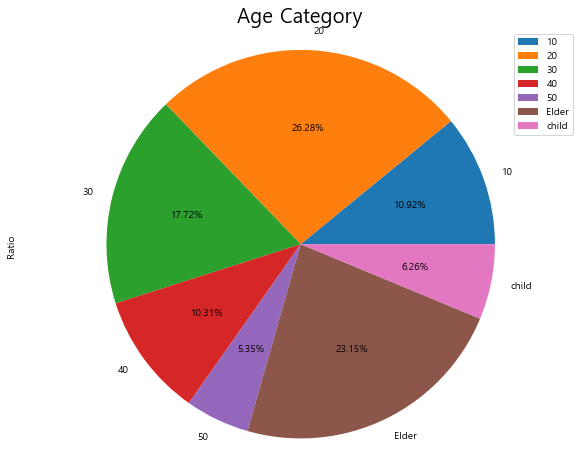

In [197]:
t3['Ratio']=1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat)

df_age_cat.Ratio.plot(kind='pie',        # 원형그래프
                     figsize=(10,8),
                      autopct='%.2f%%',  #  전체에서 퍼센트 계산
                      startangle=0)
plt.title('Age Category',size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index,loc='best')

<AxesSubplot:xlabel='length', ylabel='Count'>

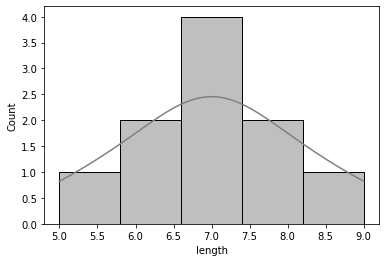

In [25]:
# 물고기 종류별 몸 길이 데이터
df = pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸 길이 데이터 추출
length_a = df.query('species == "A"')['length']
length_a = df.query('species == "B"')['length']
sns.histplot(length_a,color='gray',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

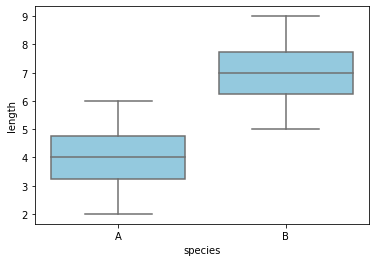

In [27]:
sns.boxplot(x='species',y='length',data=df,color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

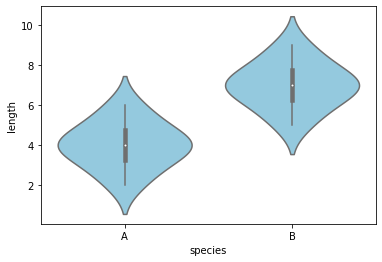

In [28]:
# 바이올린 플롯
sns.violinplot(x='species',y='length',data=df,color='skyblue')

In [29]:
df1 = df.copy()
df1.iloc[5,1] = 10
df1.iloc[10,1] = 2

<AxesSubplot:xlabel='species', ylabel='length'>

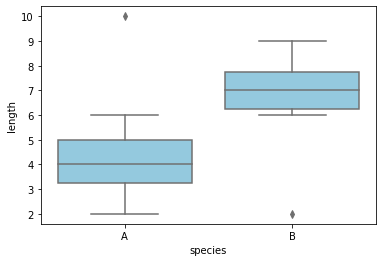

In [31]:
# Q.[과제] df1으로 박스플롯을 확인한 수 이상치를 구하세요
sns.boxplot(x='species',y='length',data=df1,color='skyblue')

In [36]:
Q3_A = df.loc[df.species=='A','length'].describe()['75%']
Q1_A = df.loc[df.species=='A','length'].describe()['25%']
Q3_B = df.loc[df.species=='B','length'].describe()['75%']
Q1_B = df.loc[df.species=='B','length'].describe()['25%']
IQR_A = Q3_A - Q1_A
IQR_B = Q3_B - Q1_B
up_check_A = Q3_A + 1.5*IQR_A
down_check_B = Q1_B - 1.5*IQR_B
# print(up_check)
# df.Start.loc[df.Start>up_check]
df.loc[df.species=='A','length'].describe()['75%']

4.75

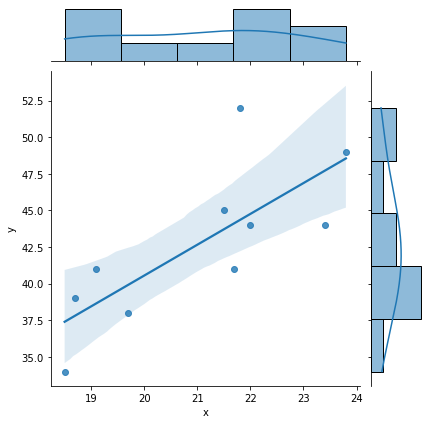

In [40]:
cov_df = pd.read_csv('./dataset/4_cov.csv')
sns.jointplot(cov_df.x,cov_df.y,kind='reg')

In [41]:
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


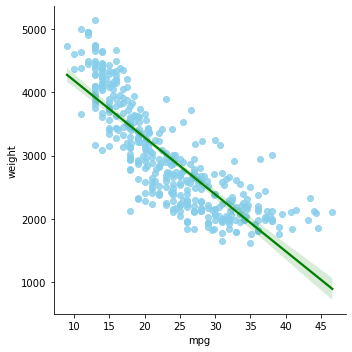

In [45]:
sns.lmplot(x='mpg',y='weight',data=df_auto, scatter_kws={'color':'skyblue'}, line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

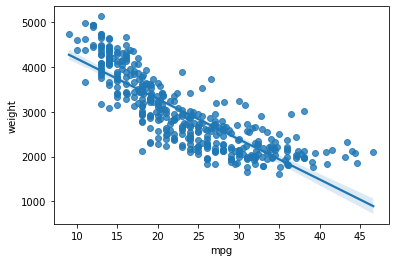

In [46]:
sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg = True)

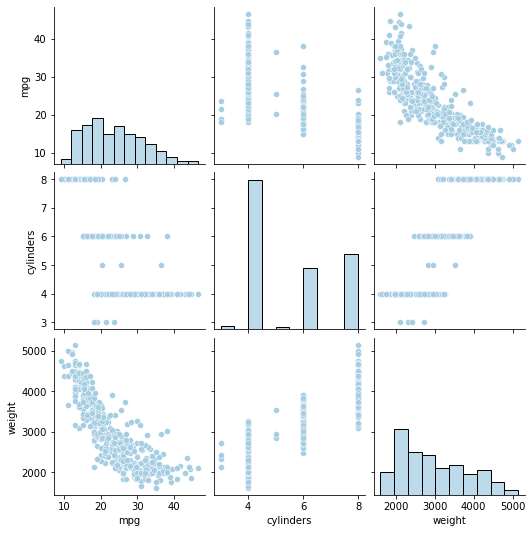

In [53]:
sns.set_palette('Paired')
df2 = df_auto[['mpg','cylinders','weight','horsepower']]
sns.pairplot(df2)

Text(0.5, 1.0, 'Heatmap of the Dataset')

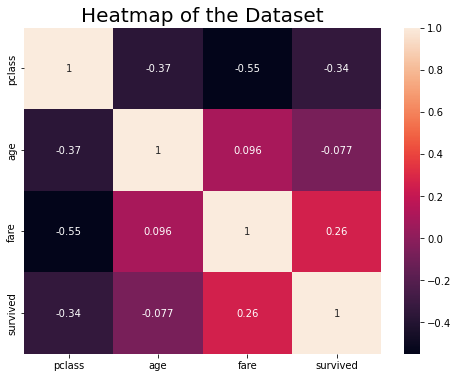

In [56]:
tdf = sns.load_dataset('titanic')
plt.figure(figsize = (8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize = 20)

In [58]:
table = tdf.pivot_table(index=['sex'], columns=['class'],values=['survived'],aggfunc ='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

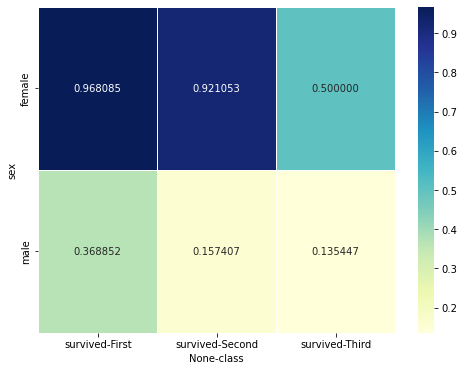

In [60]:
plt.figure(figsize = (8,6))
sns.heatmap(table,
           annot= True,fmt='f',
           cmap = 'YlGnBu',
           linewidth=.5,
           cbar=True)